In [7]:
import numpy as np
import os, sys
from evoman.environment import Environment
from demo_controller import player_controller


In [71]:
dom_l = 1
dom_u = -1
mu = 0
sigma = 0.21
print('settings:')
n_hidden_neurons = 128

# choose this for not using visuals and thus making experiments faster
headless = True
if headless:
    os.environ["SDL_VIDEODRIVER"] = "dummy"


experiment_name = 'test'
if not os.path.exists(experiment_name):
    os.makedirs(experiment_name)

env = Environment(experiment_name=experiment_name,
                  enemies=[1], # enemy number 1 is selected
                  playermode="ai",
                  player_controller=player_controller(n_hidden_neurons),
                  enemymode="static",
                  level=2,
                  speed="fastest",
                  visuals=False)

n_vars = (env.get_num_sensors() + 1) * n_hidden_neurons + (n_hidden_neurons + 1) * 5


settings:

MESSAGE: Pygame initialized for simulation.


In [72]:
# pop = np.random.uniform(dom_l, dom_u, (1, n_vars))

pop = np.random.normal(mu, sigma, size=(1, n_vars))
mean = abs(mu - np.mean(pop[0]))
variance = abs(sigma - np.std(pop[0], ddof=1))
print(mean, variance)

0.0002209476210814109 0.0018074871854121266


In [73]:
print(pop)

[[-0.05826692 -0.1622962   0.38903745 ...  0.32036048  0.36088334
   0.30054731]]


In [74]:
print(len(pop[0])) # 3333
print(max(pop[0])) # 0.8
print(min(pop[0])) # 
print(len(pop)) # 1
print(n_vars) # 3333
print(env.get_num_sensors()) # 20

3333
0.7031585652265847
-0.757110744305975
1
3333
20


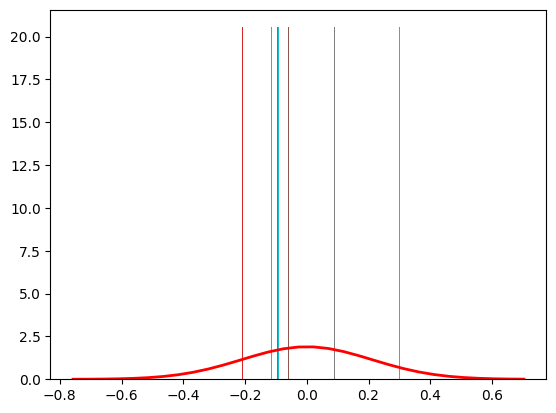

In [75]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(pop, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [1]:
a = [1, 2, 3, 4, 5]
b = [5, 4, 3, 2, 1]
print(a + b)
print(a - b)

[1, 2, 3, 4, 5, 5, 4, 3, 2, 1]


TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [2]:
a = [1, 2, 3, 4, 5]
b = [5, 4, 3, 2, 1]

# Element-wise subtraction with absolute value
result = [abs(x - y) for x, y in zip(a, b)]

print(result)

[4, 2, 0, 2, 4]


In [20]:
def similarity(source_island, destination_best, migration_size):
    source_island_copy = source_island.copy()
    most_similar = []
    for i in range(migration_size):
        similarity = 9999
        for individual in source_island_copy:
            difference = [abs(a - b) for a, b in zip(destination_best, individual)]
            sum_diff = sum(difference)
            if sum_diff <= similarity:
                similarity = sum_diff
                most_similar_ind = individual
        most_similar.append(most_similar_ind)
        source_island_copy.remove(most_similar_ind)

    return most_similar


source_island = [[1, 2, 1, 4, 5], [5, 4, 3, 2, 1], [3, 3, 3, 3, 3]]
destination_best = [1, 1, 1, 1, 1]
migration_size = 2
most_similar = similarity(source_island, destination_best, migration_size)
print(most_similar)
print("source_island end", source_island)


[[1, 2, 1, 4, 5], [3, 3, 3, 3, 3]]
source_island end [[1, 2, 1, 4, 5], [5, 4, 3, 2, 1], [3, 3, 3, 3, 3]]


In [16]:
import numpy as np

# Assuming flattened_world_pop_fit is a 3D NumPy array
world = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
n_islands = world.shape[1]

# Convert 3D array to 2D array
# flattened_world_pop_fit = world.reshape(2, 12)
flattened_world_pop_fit = np.concatenate([world[i] for i in range(n_islands)], axis=0)

print(flattened_world_pop_fit)
print(flattened_world_pop_fit.shape)
print(world.shape)


[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
(4, 3)
(2, 2, 3)
